In [2]:
import sys

path_src = '../src'
sys.path.append(path_src)
import importlib
import SpatialAnalysis as SpAn
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

path_src = '../../tysserand2/'


Script loaded!


Script loaded!


<Axes: >

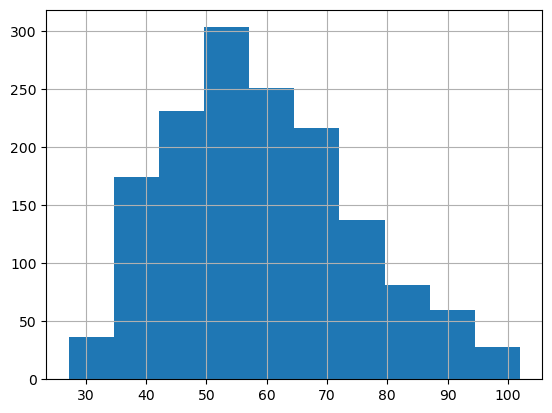

In [64]:
importlib.reload(SpAn)
coords = pd.read_csv('../data/publicdatasets/fcortex.coordinates.txt',sep=' ', index_col=0, header=None)
points = coords.iloc[:,[1,2]]
knn_edges = SpAn.knn_edges(points, k = 1)
distances = SpAn.get_distances(points, knn_edges)
distances = SpAn.filter_top(distances,95) 
pd.Series(distances).hist()

# 

# Immune cell topography predicts response to PD-1 blockade in cutaneous T cell lymphoma


Script loaded!


,X,Y,Z,FileName
0,165,979,9,reg001
1,219,859,7,reg001
2,328,1105,7,reg001
3,422,120,7,reg001
4,415,870,8,reg001
...,...,...,...,...
117165,1594,222,9,reg066
117166,1639,635,8,reg066
117167,1637,657,9,reg066
117168,1658,761,8,reg066


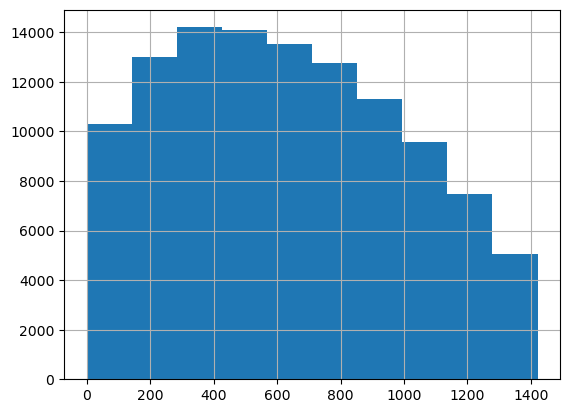

In [65]:
import importlib
importlib.reload(SpAn)
coords = pd.read_csv('../data/publicdatasets/41467_2021_26974_MOESM3_ESM_-_Objects-coords.csv', sep=';')
points = coords.iloc[:,[1,2]]
knn_edges = SpAn.multi_sample_edges(coords, sample_col='FileName')
points = coords[['X','Y']]
distances = SpAn.get_distances(points, knn_edges)
distances = SpAn.filter_top(distances,95) 
pd.Series(distances).hist()
coords


# SlideSeq V2

Script loaded!


<Axes: >

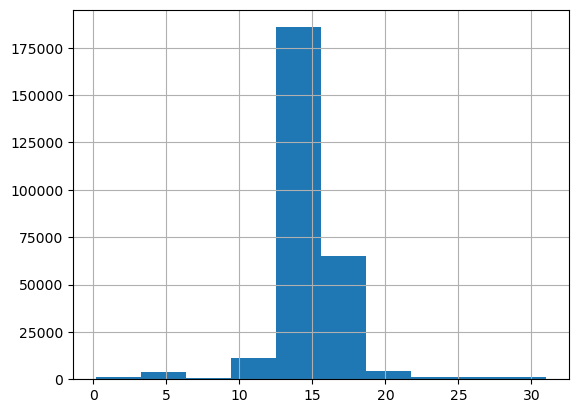

In [59]:
import glob
import pathlib
importlib.reload(SpAn)

SlideSeq_path = '../data/publicdatasets/SlideSeqV2/*csv'
distances = []
for file in glob.glob(SlideSeq_path) :
    coords = pd.read_csv(file ,sep=',', index_col=0)
    points = coords.iloc[:,[0,1]]
    knn_edges = SpAn.knn_edges(points, k = 1)
    distance = SpAn.get_distances(points, knn_edges)
    distance = SpAn.filter_top(distance,95) 
    distances += distance
pd.Series(distances).hist()



In [58]:
distances

[]